<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

# TFM - Sistema de alerta ante la presencia de Didymosphenia Geminata en agua dulce con técnicas de inteligencia artificial

Presentado por: Aracena Vallejos, Estefania – Medina Jiménez, Lenin  
Directora: Prados Privado, María

## Ensembled Learning - Neural Network
El objetivo implementar un modelo de predicción para el crecimiento de Didymo en los sistemas hídricos de Chile, utilizando el método Neural Network. El conjunto de datos utilizado fue proporcionado por el Instituto de Fomento Pesquero de Puerto Montt, y se centra en las siguientes clases: 
> Crec_alga_Ausent: representa la ausencia de crecimiento del Didymo en el sistema hídrico.  
> Crec_alga_Inicial: indica un nivel inicial de crecimiento del Didymo.   
> Crec_alga_Mediana: representa un nivel intermedio de crecimiento del Didymo.  
> Crec_alga_Alta: indica un nivel alto de crecimiento del Didymo.  
> Crec_alga_Muy_Alta: representa el nivel más alto de crecimiento del Didymo

## Importación de librerias necesarias

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

## Cargar el Dataset

In [2]:
# Carda de datos para realizar EDA
dataset = pd.read_csv('data.csv', sep=';')
dataset.head()

,Unnamed: 0,T°,categoria,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,...,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta,%Cob_algal_ausente,%Cob_algal_Pequenas colonias,%Cob_algal_Mediana,%Cob_algal_Alta,%Cob_algal_Muy Alta,Didymo
0,0,14.8,%Cob_algal_Alta,8.2,80.0,40.0,11.8,118.4,7.9,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,15.6,%Cob_algal_Alta,6.7,73.0,36.0,12.2,124.2,9.2,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,11.1,%Cob_algal_Alta,7.1,152.0,76.0,10.0,101.5,5.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,15.2,%Cob_algal_Alta,7.8,82.0,13.8,11.8,111.8,4.2,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4,13.9,%Cob_algal_Muy Alta,7.4,31.0,15.0,10.4,102.3,4.5,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Modelo con Random Forest

In [3]:
columnas = ['T°', 'pH', 'Ce', 'TDS', 'OD', '%Sat. O', 'Ca', 'PO4', 'P T', 'Fe',
       'NO3', 'NO2', 'NT', 'NKT', 'Si T', 'Turbidez', 'Didymo', 'Crec_algal_Ausente',
       'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta',
       'Crec_algal_Muy Alta']

In [4]:
dataset_NN = dataset[columnas]
dataset_NN

,T°,pH,Ce,TDS,OD,%Sat. O,Ca,PO4,P T,Fe,...,NT,NKT,Si T,Turbidez,Didymo,Crec_algal_Ausente,Crec_algal_Inicial,Crec_algal_Mediana,Crec_algal_Alta,Crec_algal_Muy Alta
0,14.8,8.2,80.0,40.0,11.8,118.4,7.9,1.000,0.6000,0.021,...,2.900,2.900,1.0,0.7,0.00,0.0,0.0,1.0,0.0,0.0
1,15.6,6.7,73.0,36.0,12.2,124.2,9.2,1.000,0.7000,0.021,...,4.600,4.600,21.5,0.2,0.00,0.0,0.0,0.0,1.0,0.0
2,11.1,7.1,152.0,76.0,10.0,101.5,5.5,1.000,0.2000,0.021,...,1.900,1.900,22.7,0.2,0.00,0.0,0.0,1.0,0.0,0.0
3,15.2,7.8,82.0,13.8,11.8,111.8,4.2,1.000,1.0000,0.021,...,2.000,2.000,14.9,0.3,0.00,0.0,1.0,0.0,0.0,0.0
4,13.9,7.4,31.0,15.0,10.4,102.3,4.5,1.000,0.2000,0.021,...,2.000,2.000,9.0,0.6,0.00,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1600,6.0,7.5,44.0,22.0,18.8,117.3,8.3,0.151,0.0336,0.036,...,0.278,0.226,15.4,1.1,9.51,0.0,1.0,0.0,0.0,0.0
1601,13.5,7.5,49.0,25.0,11.4,109.7,6.0,0.001,0.0004,0.015,...,0.080,0.022,10.3,0.4,0.00,0.0,1.0,0.0,0.0,0.0
1602,11.7,7.4,74.0,37.0,11.3,105.9,5.3,0.001,0.0004,0.018,...,0.070,0.027,16.9,0.6,0.00,0.0,1.0,0.0,0.0,0.0
1603,7.0,7.4,39.0,19.0,13.3,118.4,8.3,0.151,0.0336,0.036,...,0.278,0.226,15.4,1.1,9.51,0.0,1.0,0.0,0.0,0.0


In [5]:
dataset_NN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   T°                   1605 non-null   float64
 1   pH                   1605 non-null   float64
 2   Ce                   1605 non-null   float64
 3   TDS                  1605 non-null   float64
 4   OD                   1605 non-null   float64
 5   %Sat. O              1605 non-null   float64
 6   Ca                   1605 non-null   float64
 7   PO4                  1605 non-null   float64
 8   P T                  1605 non-null   float64
 9   Fe                   1605 non-null   float64
 10  NO3                  1605 non-null   float64
 11  NO2                  1605 non-null   float64
 12  NT                   1605 non-null   float64
 13  NKT                  1605 non-null   float64
 14  Si T                 1605 non-null   float64
 15  Turbidez             1605 non-null   f

In [6]:
# Definir las características (X) y la variable objetivo (y)
X = dataset_NN.drop([  'Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 'Crec_algal_Muy Alta'], axis=1)
y = dataset_NN[['Crec_algal_Ausente', 'Crec_algal_Inicial', 'Crec_algal_Mediana', 'Crec_algal_Alta', 'Crec_algal_Muy Alta']]

In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Convertir las etiquetas a codificación one-hot
num_features = X_train.shape[1]
num_classes = 5

In [9]:
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', use_bias=True, kernel_initializer="he_normal", input_shape=[X_train.shape[1]]),
    keras.layers.Dense(100, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(90, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(80, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(70, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(60, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(50, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(40, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(30, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(20, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation='relu', use_bias=True, kernel_initializer="he_normal"),
    keras.layers.Dense(5, activation='softmax', kernel_initializer="glorot_uniform")])

model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy', 'AUC', 'Precision'] )

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1800      
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 90)                9090      
                                                                 
 dense_3 (Dense)             (None, 80)                7280      
                                                                 
 dense_4 (Dense)             (None, 70)                5670      
                                                                 
 dense_5 (Dense)             (None, 60)                4260      
                                                                 
 dense_6 (Dense)             (None, 50)                3

In [11]:
#Código de ajuste y entrenamiento
tf.data.experimental.enable_debug_mode()
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 200
history = model.fit(X_train, y_train, epochs=EPOCHS, validation_data=(X_test, y_test), verbose=0, callbacks=[PrintDot()])




....................................................................................................
....................................................................................................

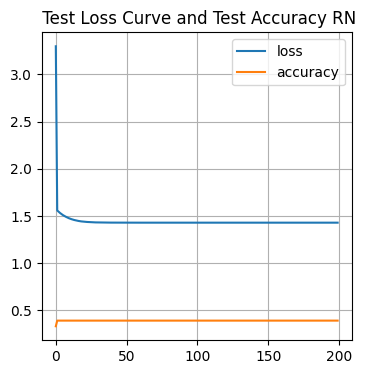

In [12]:
resumen1=pd.DataFrame(history.history)
plt.figure(figsize=[4,4])
plt.plot(resumen1['loss'], label='loss')
plt.plot(resumen1['accuracy'], label='accuracy')
plt.grid(True)
#plt.gca().set_ylim(0,2)
plt.legend()
plt.title(' Test Loss Curve and Test Accuracy RN')
plt.savefig('rn.jpg')
plt.show()

In [13]:

model_evaluacion_train=model.evaluate(X_train, y_train)[1]
precision_evaluacion_train=model.evaluate(X_train, y_train)[3]

41/41 [==============================] - 0s 2ms/step - loss: 1.4294 - accuracy: 0.3917 - auc: 0.6896 - precision: 0.0000e+00


In [14]:
model_evaluacion_test=model.evaluate(X_test, y_test)[1]
precision_evaluacion_test=model.evaluate(X_test, y_test)[3]

11/11 [==============================] - 0s 2ms/step - loss: 1.4204 - accuracy: 0.3863 - auc: 0.6878 - precision: 0.0000e+00


In [15]:
info1 = pd.DataFrame({'Model':[ 'RD'],
                      'Test ACC':[ model_evaluacion_test*100]}).round(decimals=2)
info1.style.highlight_max(color="green")

,Model,Test ACC
0,RD,38.630000


In [16]:
predicciones=model.predict(X_test) 
predicciones=np.argmax(predicciones, axis=1)
reales=np.argmax(y_test.values, axis=1)
matriz1 = confusion_matrix(reales, predicciones)
matriz1

11/11 [==============================] - 0s 2ms/step


array([[  0,  58,   0,   0,   0],
       [  0, 124,   0,   0,   0],
       [  0,  77,   0,   0,   0],
       [  0,  34,   0,   0,   0],
       [  0,  28,   0,   0,   0]], dtype=int64)

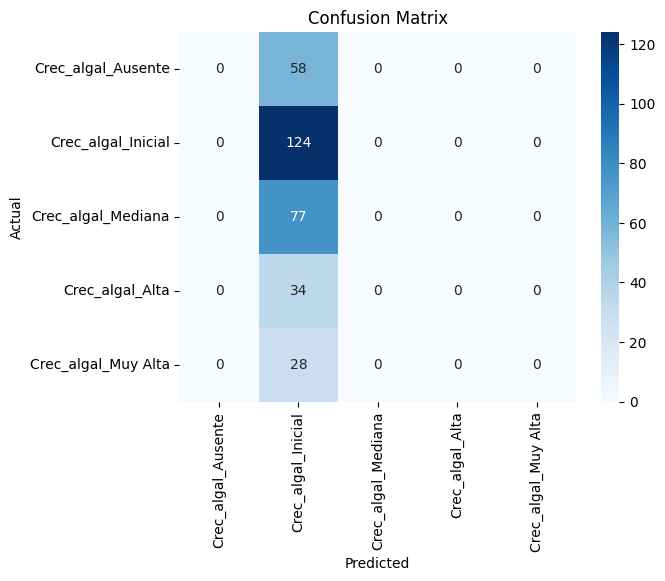

In [17]:
import seaborn as sns

ax=sns.heatmap(matriz1, annot=True, fmt='d', cmap='Blues', xticklabels=y.columns, yticklabels=y.columns)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()